In [1]:
# Imports

import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [2]:
# Função que puxa os dados do site https://www.worldometers.info/coronavirus por país

def getData(place):
    # Link que irá buscar os dados + o lugar que quer 
    link = "https://www.worldometers.info/coronavirus/country/" + place
    f = requests.get(link)
    # Transforma o conteúdo da pagina numa variável de texto que pode ser acessada
    pagina = f.text

    # Vai filtrando por palavra, até achar o vetor de dados (casos diários)
    i = pagina.find('\'Daily Cases\'')
    pagina = pagina[i:-1]
    i = pagina.find('data: ')
    pagina2=pagina[i+6:-1]
    i=pagina2.find('] ')
    data = pagina2[1:i-1]
    
    # Adiciona o vetor de dados à casos_diarios_array
    casos_diarios_array = []
    for valor in data.split(','):
        if valor == 'null':
            casos_diarios_array.append(0)
        else:
            casos_diarios_array.append(int(valor))
    
    # Vai filtrando por palavra, até achar o vetor de dados (datas)
    i = pagina.find('\'Daily Cases\'')
    pagina = pagina[i:-1]
    i = pagina.find('categories')
    pagina = pagina[i+13:-1]
    i = pagina.find(']        },\n\n')
    datas = pagina[0:i]
    datas = datas.split(',')
    datas_array=[]
    for data in datas:
        if valor == 'null':
            valor = 0
        datas_array.append(data.strip('""'))
    
    pagina = f.text
    i = pagina.find('name: \'Daily Deaths\',')
    pagina = pagina[i:-1]
    i = pagina.find('data: ')
    pagina = pagina[i+7:-1]
    i = pagina.find(']        ')
    data = pagina[:i]
    data = data.split(',')
    data
    mortes_diarias_array=[]
    for valor in data:
        if valor == 'null':
            valor = 0
        mortes_diarias_array.append(int(valor))
    
    if (place != 'us'):
        pagina = f.text
        i = pagina.find('name: \'New Recoveries\',')
        pagina = pagina[i:-1]
        i = pagina.find('data: ')
        pagina = pagina[i+7:-1]
        i = pagina.find(']        ')
        data = pagina[0:i]
        data = data.split(',')
        recuperados_array=[]
        for valor in data:
            if valor == 'null':
                valor = 0
            recuperados_array.append(int(valor))

        # Retorna as datas, e os casos diários
        return datas_array, casos_diarios_array, mortes_diarias_array, recuperados_array
    else:
        return datas_array, casos_diarios_array, mortes_diarias_array

In [3]:
# Função que faz a predição dos casos infectados para daqui x dias, utilizando dados de n_dias desde a 1a data
def predicao_covid(casos, dias_desde_inicio, n_dias, dias_no_futuro):
    # Utiliza x dias após primeiro valor de data para fazer as predições
    dias_utilizados = dias_desde_inicio[:n_dias]
    casos = casos[:n_dias]

    casos_significativos = []
    dias_significativos = []
    # Adiciona nos vetores o dia e os casos a partir do dia que teve + casos significativos
    for index, item in enumerate(casos):
        if item > 5:
            casos_significativos.insert(index,item)
            dias_significativos.append(index)
    
    # Aproxima uma curva de 2º grau, utilizando o logaritmo dos casos diários
    p = np.polyfit(dias_significativos, np.log10(casos_significativos),2)
    # Cria um vetor com os dias significativos + dias no futuro para predição
    
    dias_futuros = [i for i in range(0,dias_no_futuro)]
    
    # Prediz os dados avaliando na equação dada por p
    pred = np.polyval(p, dias_futuros)
    
    # Retorna os dias e a predição
    return dias_futuros, pred

In [4]:
# Retorna o dia correspondente após 15/02
def dia_correspondente(data,datas):
    i = datas.index(data)
    print (data + ' corresponde à ' + str(i) + ' dias após ' + datas[0])
    #print (str(i) + ' dias após ' + datas[0] +' é '  + str(datas_correspondentes[i]))
    return i

In [5]:
# DADOS DE ENTRADA DA PESQUISA

# Retorna o vetor de dados do site após scrapping
place = input ('Insira o local (inglês e minúsculo): ')

Insira o local (inglês e minúsculo): brazil


In [6]:
if place != 'us':
    datas, casos_diarios, mortes_diarias, recuperados_diarios = getData(place)
else:
    datas, casos_diarios, mortes_diarias = getData(place)

In [7]:
# DADOS DE ENTRA DA PREDIÇÃO

# Prediz para daqui x dias, a partir da data atual
daqui_dias = 30

print('Datas disponíveis: \n')
print(", ".join(data for data in datas))

dados_ate1 = input('Utilizar dados até que data? Primeira predição: ')
dados_ate2 = input('Utilizar dados até que data? Segunda predição: ')
dados_ate3 = input('Utilizar dados até que data? Terceira predição: ')
# Quantos dias de dados serão usados para cálculo da predição
predicao_dias1 = dia_correspondente(dados_ate1,datas) # Início da quarentena no brasil, 16 Março.
predicao_dias2 = dia_correspondente(dados_ate2,datas)
predicao_dias3 = dia_correspondente(dados_ate3, datas)

Datas disponíveis: 

Feb 15, Feb 16, Feb 17, Feb 18, Feb 19, Feb 20, Feb 21, Feb 22, Feb 23, Feb 24, Feb 25, Feb 26, Feb 27, Feb 28, Feb 29, Mar 01, Mar 02, Mar 03, Mar 04, Mar 05, Mar 06, Mar 07, Mar 08, Mar 09, Mar 10, Mar 11, Mar 12, Mar 13, Mar 14, Mar 15, Mar 16, Mar 17, Mar 18, Mar 19, Mar 20, Mar 21, Mar 22, Mar 23, Mar 24, Mar 25, Mar 26, Mar 27, Mar 28, Mar 29, Mar 30, Mar 31, Apr 01, Apr 02, Apr 03, Apr 04, Apr 05, Apr 06, Apr 07, Apr 08, Apr 09, Apr 10, Apr 11, Apr 12, Apr 13, Apr 14, Apr 15, Apr 16, Apr 17, Apr 18, Apr 19, Apr 20, Apr 21, Apr 22, Apr 23, Apr 24, Apr 25, Apr 26, Apr 27, Apr 28, Apr 29, Apr 30, May 01, May 02, May 03, May 04, May 05, May 06, May 07, May 08, May 09, May 10, May 11, May 12, May 13, May 14, May 15, May 16, May 17, May 18, May 19, May 20, May 21, May 22, May 23, May 24, May 25, May 26, May 27, May 28, May 29, May 30, May 31, Jun 01, Jun 02, Jun 03, Jun 04, Jun 05, Jun 06, Jun 07, Jun 08, Jun 09, Jun 10
Utilizar dados até que data? Primeira prediç

In [8]:
# Adiciona as datas desde o primeiro dado do site em forma de valores numéricos (x dias pós primeira data)
datas_numericas = []
for indice, data in enumerate(datas):
    datas_numericas.append(indice)

# Até quando será a previsão    
dias_no_futuro = datas_numericas[-1] + daqui_dias

In [9]:
# Soma acumulativa dos casos no tempo
casos_acumulados = np.cumsum(casos_diarios)

In [10]:
# Vetor de dias Correspondentes
dias_corr_jan = [str(i) for i in range(22,31)]
mes_corr_jan = ['Jan '] * len(dias_corr_jan)
dias_corr_fev = [str(i) for i in range(1,30)]
mes_corr_fev = ['Feb '] * len(dias_corr_fev)
dias_corr_mar = [str(i) for i in range(1, 32)]
mes_corr_mar = ['Mar '] * len(dias_corr_mar)
dias_corr_abr = [str(i) for i in range(1,31)]
mes_corr_abr = ['Apr '] * len(dias_corr_abr)
dias_corr_mai = [str(i) for i in range(1,32)]
mes_corr_mai = ['May '] * len(dias_corr_mai)
dias_corr_jun = [str(i) for i in range(1,31)]
mes_corr_jun = ['Jun '] * len(dias_corr_jun)
dias_corr_jul = [str(i) for i in range(1,32)]
mes_corr_jul = ['Jul '] * len(dias_corr_jul)

datas_correspondentes = []
for dia,mes in zip(dias_corr_jan, mes_corr_jan):
    datas_correspondentes.append(mes + dia)
for dia, mes in zip(dias_corr_fev,mes_corr_fev):
    datas_correspondentes.append(mes + dia)
for dia, mes in zip(dias_corr_mar, mes_corr_mar):
    datas_correspondentes.append(mes + dia)
for dia, mes in zip(dias_corr_abr, mes_corr_abr):
    datas_correspondentes.append(mes + dia)
for dia, mes in zip(dias_corr_mai, mes_corr_mai):
    datas_correspondentes.append(mes + dia)
for dia, mes in zip(dias_corr_jun, mes_corr_jun):
    datas_correspondentes.append(mes + dia)
for dia, mes in zip(dias_corr_jul, mes_corr_jul):
    datas_correspondentes.append(mes + dia)

for ind, value in enumerate(datas_correspondentes):
    if value == datas[0]:
        x = ind
# Vetor de datas correspondentes aos valores numéricos, do primeiro caso até 31 Julho        
datas_correspondentes = datas_correspondentes[x:]    

In [11]:
# Predições futuras com diferentes dias utilizados desde o primeiro valor de data

dias_futuros, pred_1 = predicao_covid(casos_diarios, datas_numericas, predicao_dias1, dias_no_futuro)   

dias_futuros, pred_2 = predicao_covid(casos_diarios, datas_numericas, predicao_dias2, dias_no_futuro)   

dias_futuros, pred_3 = predicao_covid(casos_diarios, datas_numericas, predicao_dias3, dias_no_futuro)   

In [12]:
# Retorna a soma dos casos e última data atualizada
ultima_data = datas[-1]
ultima_data_num = datas_numericas[-1]
total_casos_conf = sum(casos_diarios)
total_mortes = sum(mortes_diarias)
if (place != 'us'):
    total_recuperados = sum(recuperados_diarios)
mortalidade = total_mortes/total_casos_conf
mortalidade_cada100 = mortalidade*100

# Mostra as informações
print ('Última Atualização:', ultima_data)
print ('Total de Casos:', total_casos_conf)
print('Total de Mortes:', total_mortes)
if (place != 'us'):
    print('Total de Recuperados:', total_recuperados)
print('Mortalidade a cada 100 Casos:', mortalidade_cada100)


Última Atualização: Jun 10
Total de Casos: 745393
Total de Mortes: 39797
Total de Recuperados: 380300
Mortalidade a cada 100 Casos: 5.339062749448948


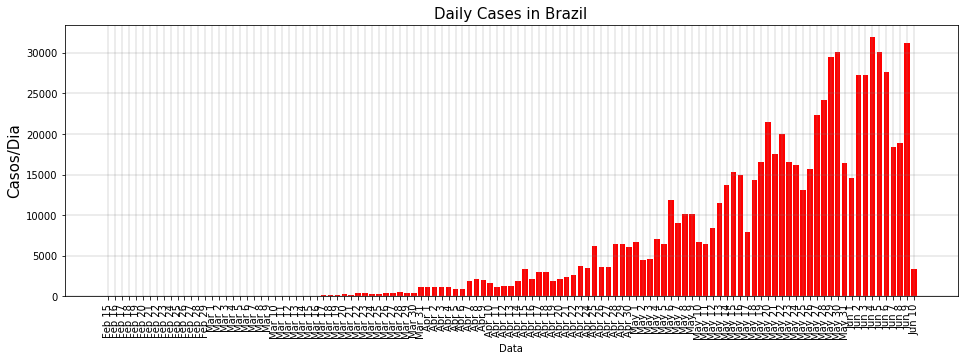

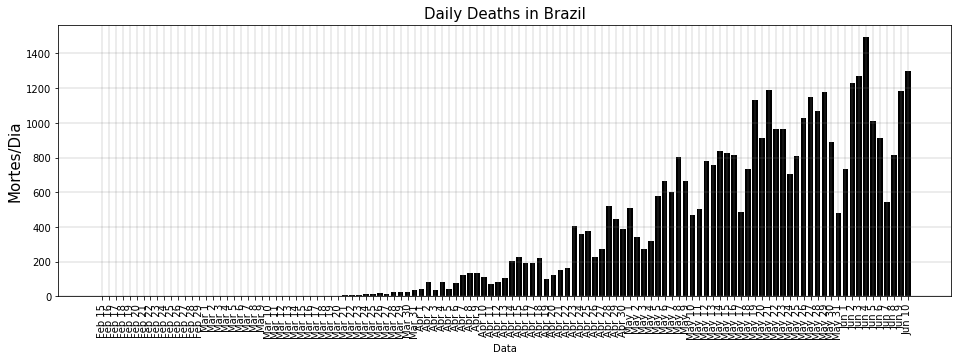

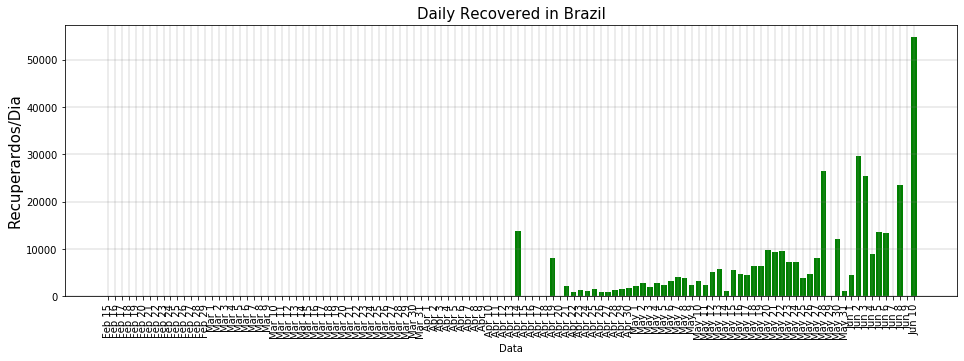

In [13]:
# Informações Gerais


#pp = PdfPages('relatorio.pdf')


plt.figure(1,figsize=(16,5))
plt.xticks(datas_numericas, datas_correspondentes, rotation = 90)
plt.bar(datas_numericas, casos_diarios, color='red')
plt.xlabel ('Data')
plt.ylabel ('Casos/Dia', size = 15)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.title ('Daily Cases in ' + place.capitalize(), size = 15)
#pp.savefig(1)

plt.figure(2, figsize=(16,5))
plt.xticks(datas_numericas, datas_correspondentes, rotation = 90)
plt.bar(datas_numericas, mortes_diarias, color='black')
plt.xlabel ('Data')
plt.ylabel ('Mortes/Dia', size = 15)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.title ('Daily Deaths in ' + place.capitalize(), size = 15)
#pp.savefig(2)


if (place != 'us'):
    plt.figure(3,figsize=(16,5))
    plt.xticks(datas_numericas, datas_correspondentes, rotation = 90)
    plt.bar(datas_numericas, recuperados_diarios, color = 'green')
    plt.xlabel ('Data')
    plt.ylabel ('Recuperardos/Dia', size = 15)
    plt.grid(color='gray', linestyle='-', linewidth=0.3)
    plt.title ('Daily Recovered in ' + place.capitalize(), size = 15)
#pp.savefig(3)
    


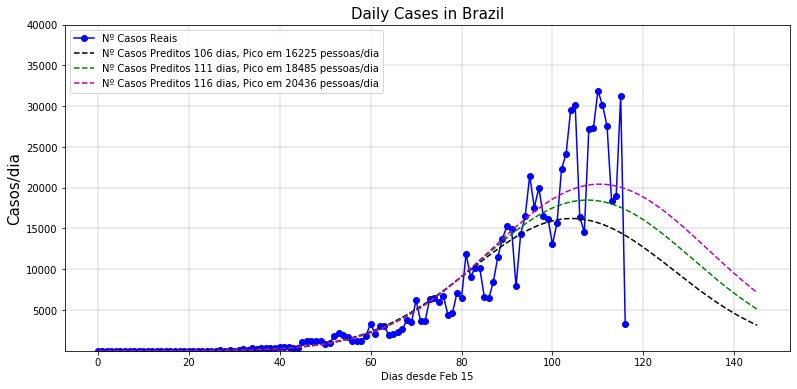

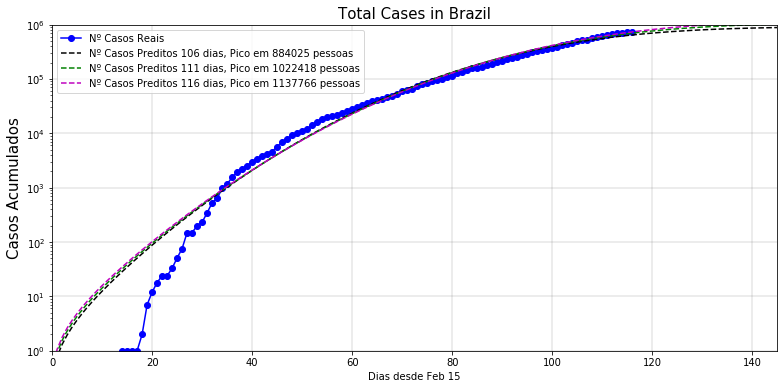

In [17]:
# Informações de predição dos dados 
plt.figure(4, figsize=(13,6))
plt.plot(datas_numericas, casos_diarios, 'b-o', label = 'Nº Casos Reais')
plt.plot(dias_futuros, 10**pred_1,'k--', label = 'Nº Casos Preditos ' + str(predicao_dias1)+' dias, Pico em ' + str(int(round(max(10**pred_1)))) + ' pessoas/dia')
plt.plot(dias_futuros,10**pred_2,'g--', label = 'Nº Casos Preditos ' + str(predicao_dias2)+' dias, Pico em '  + str(int(round(max(10**pred_2)))) + ' pessoas/dia')
plt.plot(dias_futuros, 10**pred_3,'m--', label = 'Nº Casos Preditos ' + str(predicao_dias3)+' dias, Pico em ' + str(int(round(max(10**pred_3)))) + ' pessoas/dia')
plt.xlabel ('Dias desde ' + datas[0])
plt.ylabel ('Casos/dia', size = 15)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.title ('Daily Cases in ' + place.capitalize(), size = 15)
plt.ylim((1,40e3))
if (place == 'us'):
    plt.ylim((1,50e3))
plt.legend(loc = 'upper left')
#pp.savefig(4)

plt.figure(5,figsize=(13,6))
plt.semilogy(datas_numericas, np.cumsum(casos_diarios), 'b-o', label = 'Nº Casos Reais')
plt.semilogy(dias_futuros, np.cumsum(10**pred_1),'k--', label = 'Nº Casos Preditos ' + str(predicao_dias1)+' dias, Pico em ' + str(int(round(max(np.cumsum(10**pred_1))))) + ' pessoas')
plt.semilogy(dias_futuros, np.cumsum(10**pred_2),'g--', label = 'Nº Casos Preditos ' + str(predicao_dias2)+' dias, Pico em ' + str(int(round(max(np.cumsum(10**pred_2))))) + ' pessoas')
plt.semilogy(dias_futuros, np.cumsum(10**pred_3),'m--', label = 'Nº Casos Preditos ' + str(predicao_dias3)+' dias, Pico em ' + str(int(round(max(np.cumsum(10**pred_3))))) + ' pessoas')  
plt.xlabel ('Dias desde ' + datas[0])
plt.ylabel ('Casos Acumulados', size = 15)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
plt.title ('Total Cases in ' + place.capitalize(), size = 15)
plt.ylim((1,1e6))
if (place == 'us'):
    plt.ylim((1,10e6))
plt.xlim((0, dias_futuros[-1]))
plt.legend(loc = 'best')
#pp.savefig(5)

#pp.close()

A mortalidade do vírus é aproximadamente 1.2%, isso significa que no Brasil, estão testando aproximadamente 4.45 vezes menos.


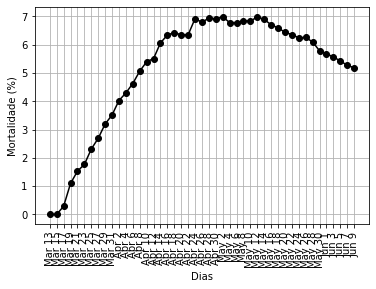

In [15]:
letalidade = []
morte_acum = np.cumsum(mortes_diarias)
casos_acum = np.cumsum(casos_diarios)
for mortes, casos in zip(morte_acum, casos_acum):
    if (mortes == 0 | casos == 0):
        letalidade.append(0)
    else:
        letalidade.append((mortes/casos)*100)

plt.xticks(datas_numericas[27:len(datas_numericas):2], datas_correspondentes[27:len(datas_numericas):2], rotation = 90)
plt.plot(datas_numericas[27:len(datas_numericas):2], letalidade[27:len(datas_numericas):2], 'k-o')
plt.grid()
plt.xlabel ('Dias')
plt.ylabel ('Mortalidade (%)')


print(f'A mortalidade do vírus é aproximadamente 1.2%, isso significa que no Brasil, estão testando aproximadamente {letalidade[-1]/1.2:.2f} vezes menos.')

In [19]:
dia_correspondente('Jul 30', datas_correspondentes)

Jul 30 corresponde à 166 dias após Feb 15


166